<a href="https://colab.research.google.com/github/PRAN20/Cv-vs-Pil/blob/main/Geometric_Transform_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Header Files**

In [2]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import cv2

**Declaring Concatenate Function**

In [3]:
def conc_image (image1, image2, title_1 = "Original Image", title_2 = "New Image"):
  plt.figure(figsize=(5,5))
  plt.subplot(1,2,1)
  plt.title(title_1)
  plt.imshow(image1, cmap= "gray")

  plt.subplot(1,2,2)
  plt.title(title_2)
  plt.imshow(image2, cmap= "gray")
  plt.show()

## **Geometric-Transformation**

## Scaling


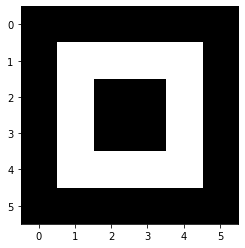

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [4]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

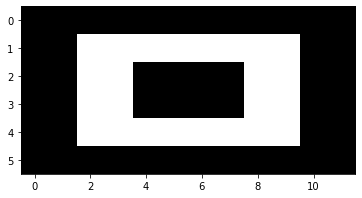

In [5]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()

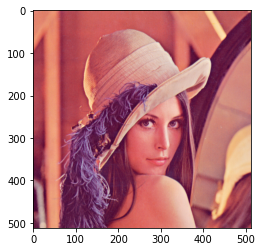

In [6]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

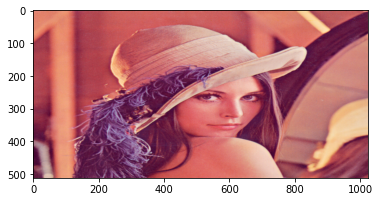

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [7]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

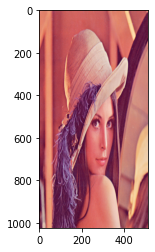

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [8]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

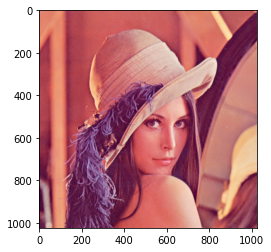

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [9]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

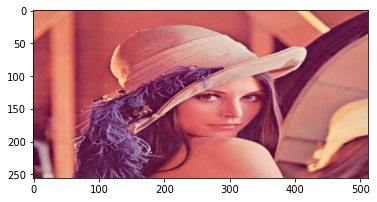

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [10]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

In [11]:
rows = 100
cols = 200

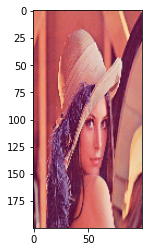

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [12]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

## Translation


In [13]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [14]:
rows, cols, _ = image.shape

In [15]:
new_image = cv2.warpAffine(image, M, (cols, rows))

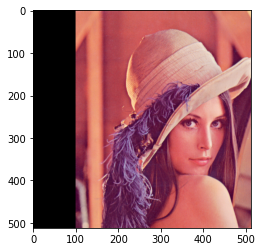

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

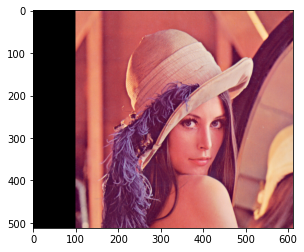

In [17]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

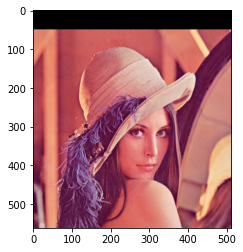

In [18]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

## Rotation


In [19]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

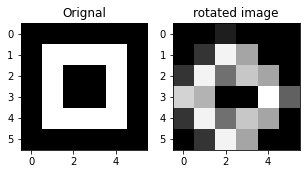

In [21]:
conc_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

Looking at intensity values, we see that many values have been interpolated:


In [22]:
new_toy_image 

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

We can perform the same operation on color images:


In [23]:
cols, rows, _ = image.shape

In [24]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

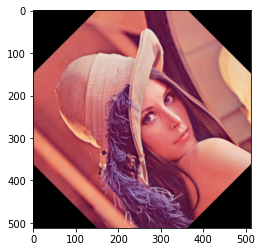

In [25]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

# **Mathematical Opperation**

## Array Operations


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.


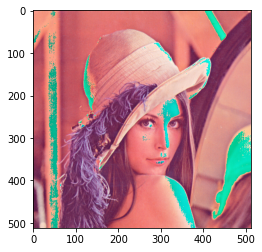

In [56]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can also multiply every pixel's intensity value by a constant value.


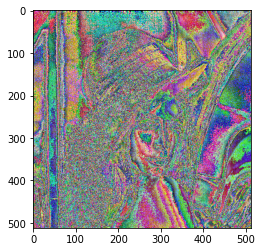

In [57]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [58]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape


(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


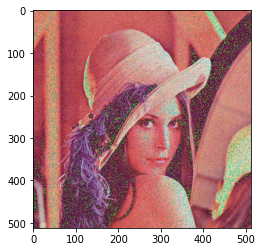

In [59]:
new_image = image + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result.


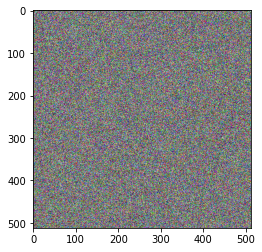

In [60]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

## Matrix Operations


Grayscale images are matrices. Consider the following grayscale image:


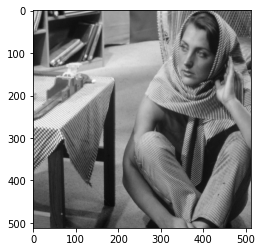

In [46]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [47]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

We see <code>s</code> is not rectangular:


In [48]:
s.shape

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [49]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)


We can plot the matrix `U` and `V`:


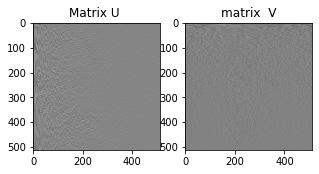

In [50]:
conc_image(U,V,title_1="Matrix U ",title_2="matrix  V")

We see most of the elements in `S` are zero:


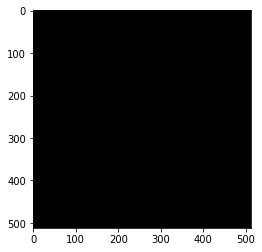

In [51]:
plt.imshow(S,cmap='gray')
plt.show()

We can find the matrix product of all the matrices. First, we can perform matrix multiplication on `S` and `U` and assign it  to `B` and plot the results:


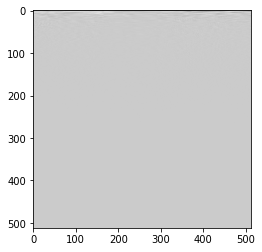

In [52]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it’s the entire image:


In [53]:
A = U.dot(B)

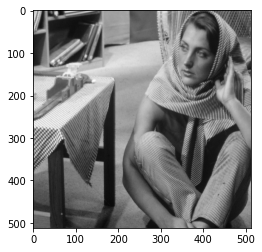

In [54]:
plt.imshow(A,cmap='gray')
plt.show()

It turns out many elements are redundant, so we can eliminate some rows and columns of `S` and `V` and approximate the image by finding the product.


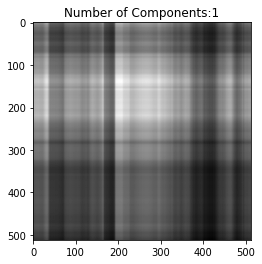

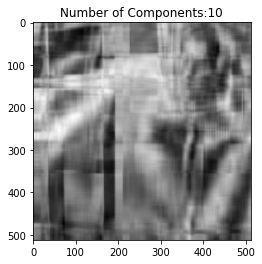

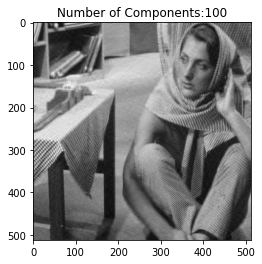

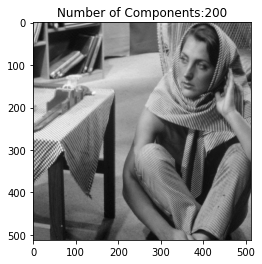

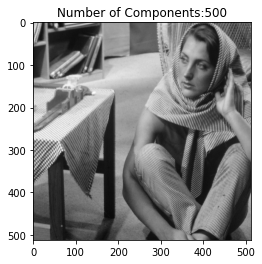

In [55]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()